In [2]:
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import rcParams
from pathlib import Path
import os.path
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau





2024-03-02 01:50:14.024787: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-02 01:50:14.056225: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 01:50:14.056251: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 01:50:14.056974: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-02 01:50:14.061420: I tensorflow/core/platform/cpu_feature_guar

In [3]:
path="data/UTKFace/"
image_dir = Path(path)
files = os.listdir(path)
size = len(files)
print("Resim Sayısı:",size)

Resim Sayısı: 23708


In [4]:
images = []
ages = []
genders = []
for file in files:
    image = cv2.imread(path+file,0)
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    split_var = file.split('_')
    ages.append(int(split_var[0]))
    genders.append(int(split_var[1]) )

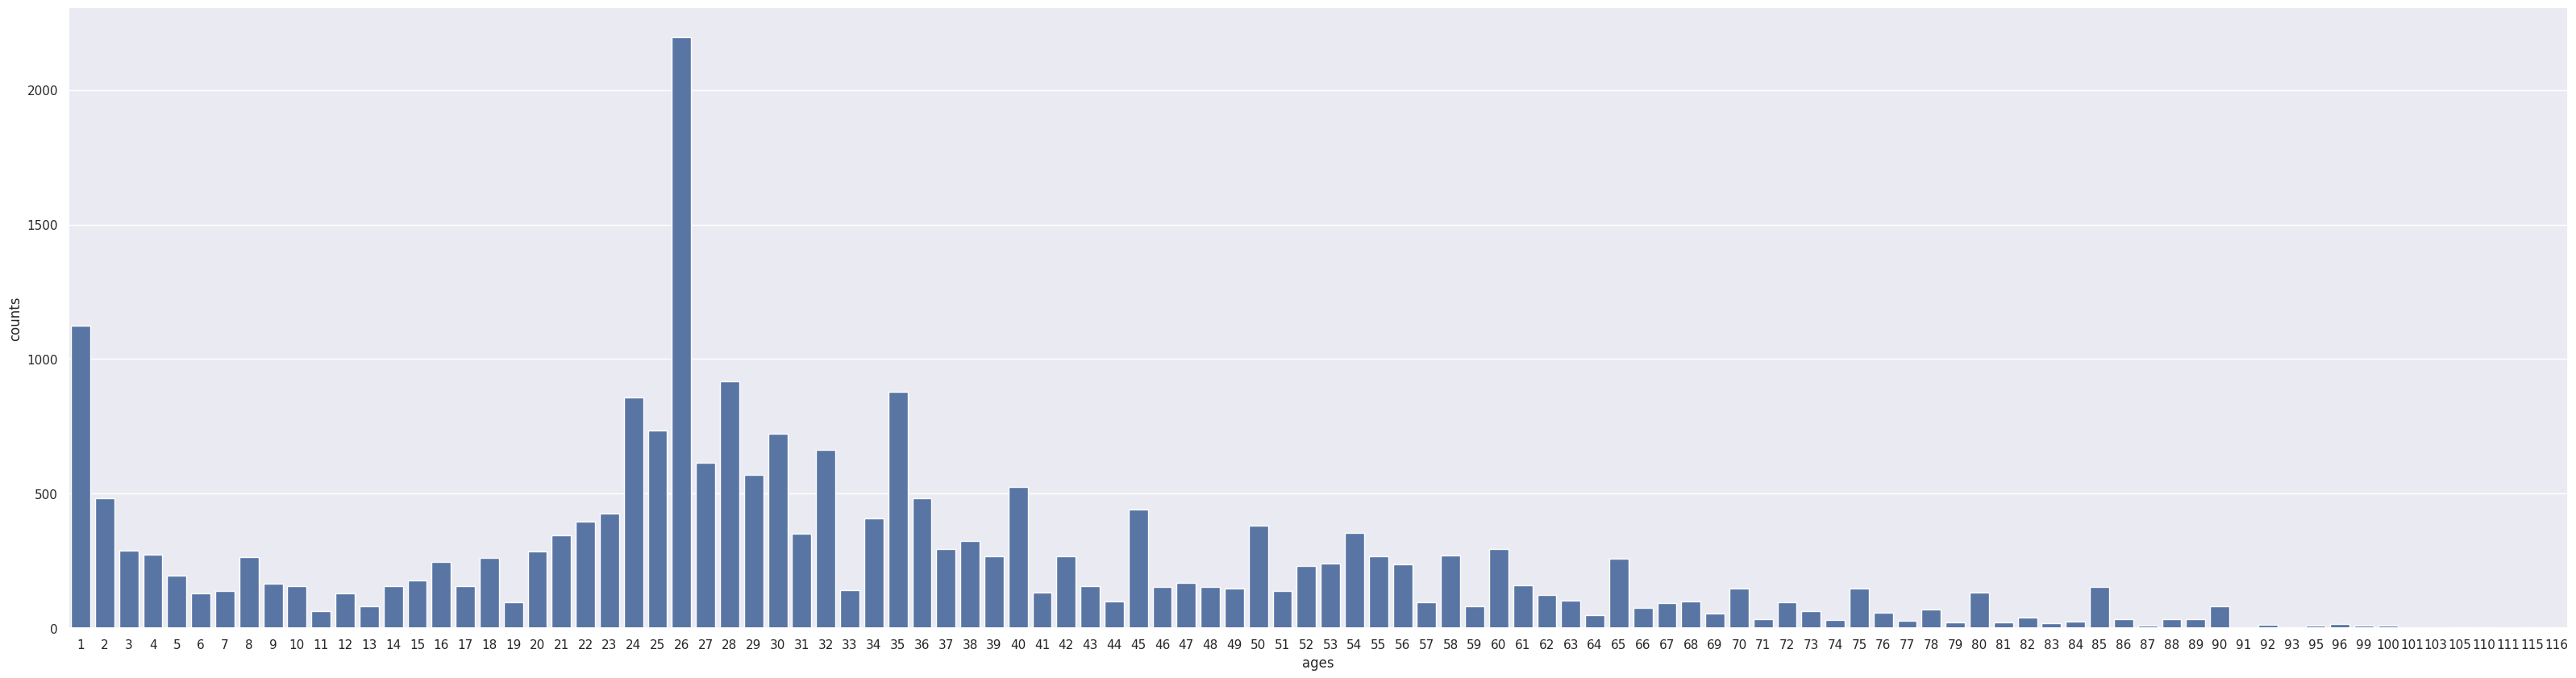

In [5]:
x_ages = list(set(ages))
x_ages.sort()
y_counter = [ages.count(i) for i in x_ages]
snsdf = pd.DataFrame({'ages': x_ages, 'counts': y_counter})
sns.set_theme(rc={'figure.figsize':(40,10)})
sns.barplot(data=snsdf, x='ages', y='counts')
plt.show()

In [6]:
import pandas as pd

# Create Series for file paths, ages, and genders
filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Filepath').astype(str)
ages = pd.Series(ages, name='Age').astype(int) 
genders = pd.Series(genders, name='Gender')

# Create DataFrame
df = pd.DataFrame({'Filepath': filepaths,
                   'Gender': genders,
                   'Age': ages})

# Randomize and reindex
path_age = df.sample(frac=1.0, random_state=1).reset_index(drop=True)

# Save DataFrames to pickle files
df.to_pickle('data/df.pkl')
path_age.to_pickle('data/path_age.pkl')

# Train-test-val split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)
train_df.to_pickle('data/train_df_n.pkl')
val_df.to_pickle('data/val_df_n.pkl')
test_df.to_pickle('data/test_df_n.pkl')


In [18]:
import pandas as pd

# Define age groups
age_group_ranges = {
    '0': (0, 2),
    '1': (3, 10),
    '2': (11, 18),
    '3': (19, 24),
    '4': (25, 34),
    '5': (35, 44),
    '6': (45, 54),
    '7': (55, 64),
    '8': (65, 120)
}

# Function to get age group
def get_age_group(age):
    for group_name, age_range in age_group_ranges.items():
        if age_range[0] <= age <= age_range[1]:
            return group_name

# Create Series for file paths, ages, and genders
filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Filepath').astype(str)
ages = pd.Series(ages, name='Ages').astype(int) 
genders = pd.Series(genders, name='Genders')

# Calculate age groups
age_groups_series = ages.apply(get_age_group)
age_groups_series.name = 'age_group'

# Create DataFrame
df = pd.DataFrame({'Filepath': filepaths,
                   'Genders': genders,
                   'age_group': age_groups_series})

# Select desired columns
df = df[['Filepath', 'Genders', 'age_group']]

# Randomize and reindex
path_age = df.sample(frac=1.0, random_state=1).reset_index(drop=True)

# Save DataFrames to pickle files
df.to_pickle('data/df.pkl')
path_age.to_pickle('data/path_age.pkl')
# Train-test-val ayrımı
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['age_group'])
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42, stratify=test_df['age_group'])
train_df.to_pickle('data/train_df.pkl')
val_df.to_pickle ('data/val_df.pkl')
test_df.to_pickle('data/test_df.pkl')

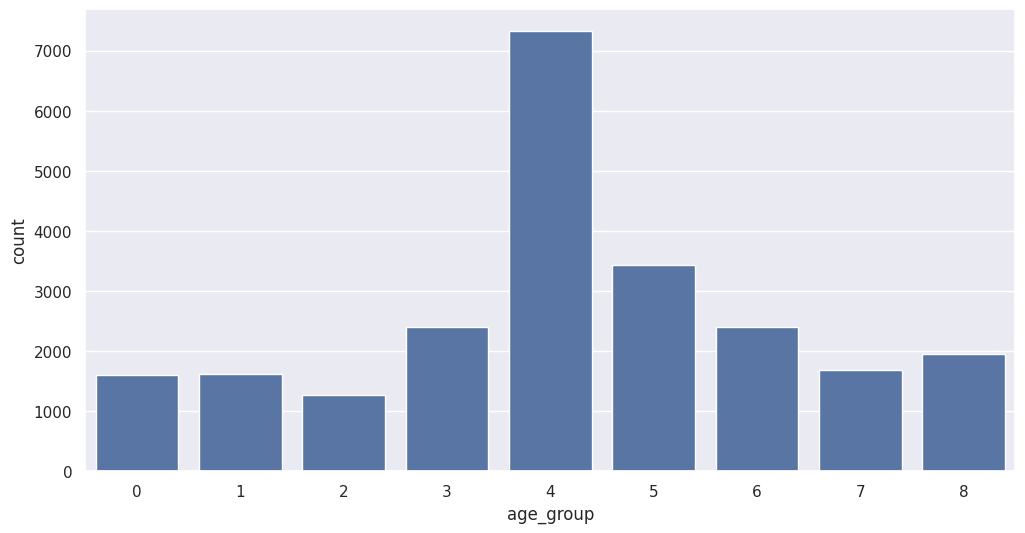

In [19]:
# Yaşları sınıflandırmak için kullanacağımız yaş-grup sözlüğü

grouped_df = df.groupby('age_group')['age_group'].count().reset_index(name='count')

# Grafik Çizdirin
sns.set_theme(rc={'figure.figsize':(12,6)})
sns.barplot(data=grouped_df, x='age_group', y='count')
plt.show()

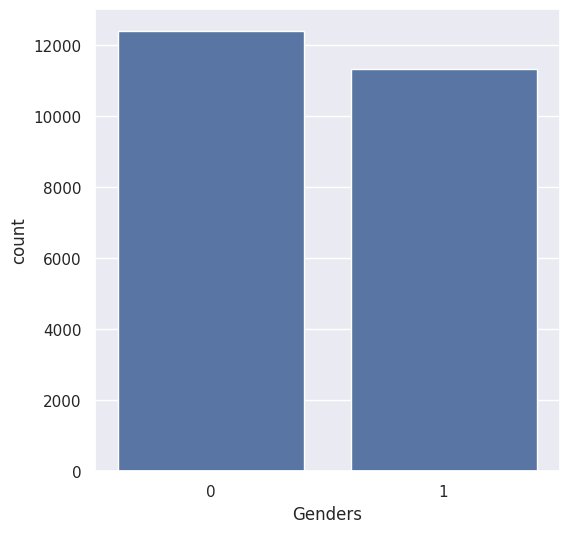

In [20]:
sns.set(rc={'figure.figsize': (6, 6)})
sns.countplot(x=genders) 
plt.show()